# Part 1: K-Means Algorithm

## Importing data 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import sys
def read_data():
    df = pd.read_csv("data.txt", names=["x", "y"])
    data = df.to_numpy()
    #NORMALIZE DATA
    norm_data = np.linalg.norm(data)
    data = data/norm_data
    return data

## Calculate distance

In [11]:
def find_distance(p1, p2):
    return sum((p1-p2)**2)

## Calculate Error

In [12]:
def find_error(centers, points):
    error = []
    for i in points:
        distance = []
        for j in centers:
            distance.append(find_distance(i, j))
        error.append(np.min(distance, axis = 0))
    return error

## Assignment Phase

In [13]:
def find_centers(centers, points):
    assign_centers = []
    for i in points:
        distance = []
        for j in centers:
            distance.append(find_distance(i, j))
        assign_centers.append(np.argmin(distance, axis = 0))
    return assign_centers

## Adjustment Phase

In [14]:
def create_new_centers(centers, points):
    new_centers = []
    points_DF = pd.DataFrame(points)
    centers_DF = pd.DataFrame(centers, columns = ["centers"])
    new_DF = pd.concat([points_DF, centers_DF], axis=1)
    for center in set(new_DF["centers"]):
        current_center = new_DF[new_DF['centers'] == center][new_DF.columns[:-1]]
        center_mean = current_center.mean(axis=0)
        new_centers.append(center_mean)   
    return new_centers

In [15]:
def main(k):
    data = read_data()
    error_values = []
    k_value = []
    iterations = []
    #for k value 1 to 29
    for k in range(1, k+1):
        k_value.append(k)
        centers_index = random.sample(range(0, len(data)), k)
        centers = []
        for i in centers_index:
            centers.append(data[i])
        e = []
        get_centers = find_centers(centers, data)
        centers = create_new_centers(get_centers, data)
        error = find_error(centers, data)
        e.append(error)
        ite = 0
        while(len(e) ==1 or sum(e[0]) < sum(e[1])):
            get_centers = find_centers(centers, data)
            centers = create_new_centers(get_centers, data)
            error = find_error(centers, data)
            e.append(error)
            ite = ite +1
        iterations.append(ite)
        error_values.append(sum(error)) #find error for each k 
    return k_value, error_values, iterations, centers, data

In [16]:
k_value, error_values, iterations, centers, data = main(20)

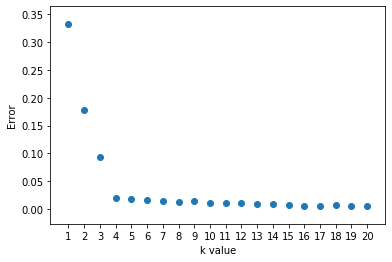

In [17]:
plt.figure()
plt.xticks(k_value)
plt.xlabel("k value")
plt.ylabel("Error")
plt.scatter(k_value, error_values) ## plot error value for each k 
plt.show()

Here we see that the elbow of the graph is at 4. This leads us to be believe there are 4 clusters. Below, we graph with the data with 4 assigned centers

1


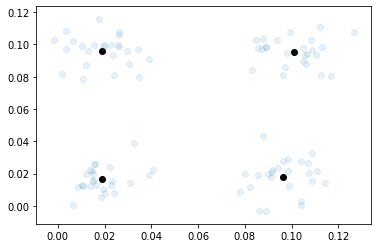

In [18]:
k_value, error_values, iterations, centers, data = main(4)
print(iterations[-1])
plt.figure()
plt.scatter(np.array(centers)[:, 0], np.array(centers)[:, 1], color='black')
plt.scatter(data[:, 0], data[:, 1], alpha=0.1)
plt.show()

We can see from this graph that there are 4 clusters.